<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/Sem8_Practica19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Enlace GitHub](https://github.com/GustavoHDLC1/Colab_Files_PADP/blob/main/Sem8_Practica19.ipynb)

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
df = pd.read_csv(url, header=None, names=column_names)

In [3]:
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
df['year'] = df['year'].astype('category')
df['status'] = df['status'].astype('category')

In [6]:
df_num = df.select_dtypes(include=["number"])
df_num.describe()

,age,nodes
count,306.000000,306.000000
mean,52.457516,4.026144
std,10.803452,7.189654
min,30.000000,0.000000
25%,44.000000,0.000000
50%,52.000000,1.000000
75%,60.750000,4.000000
max,83.000000,52.000000


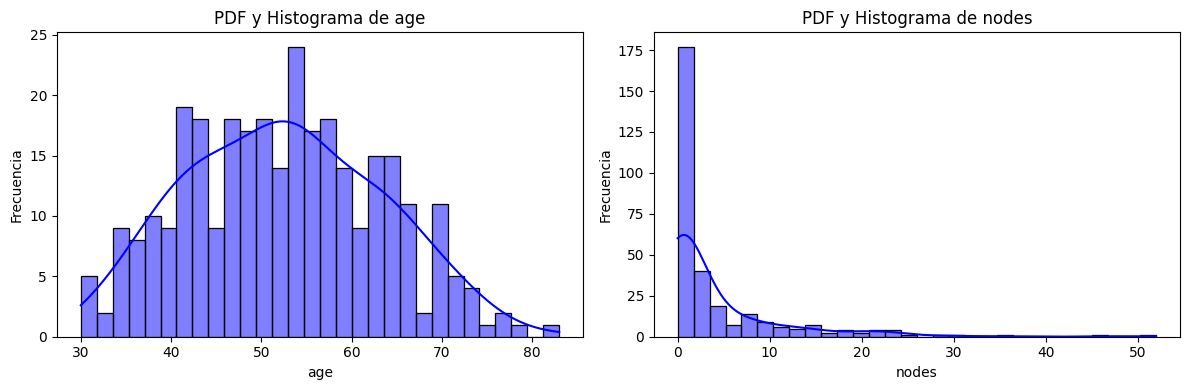

In [7]:
columns = df_num.columns
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 4))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 2, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df_num[col], kde=True, bins=30, color='blue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
survive = df['status'].value_counts().reset_index()
survive

,status,count
0,1,225
1,2,81


In [9]:
df['status'].value_counts(1).reset_index()

,status,proportion
0,1,0.735294
1,2,0.264706


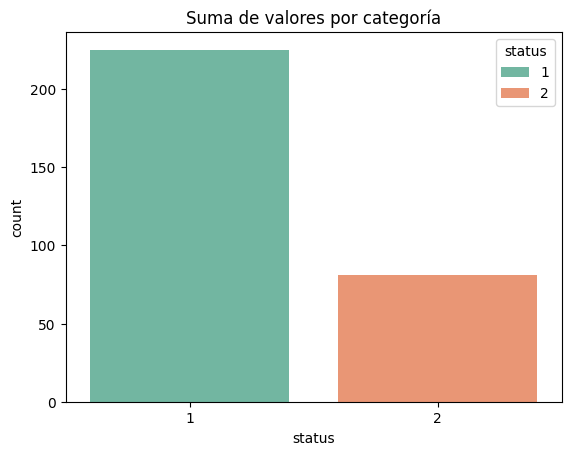

In [10]:
sns.barplot(x="status", y="count", data=survive, hue="status", palette="Set2")
plt.title("Suma de valores por categoría")
plt.show()

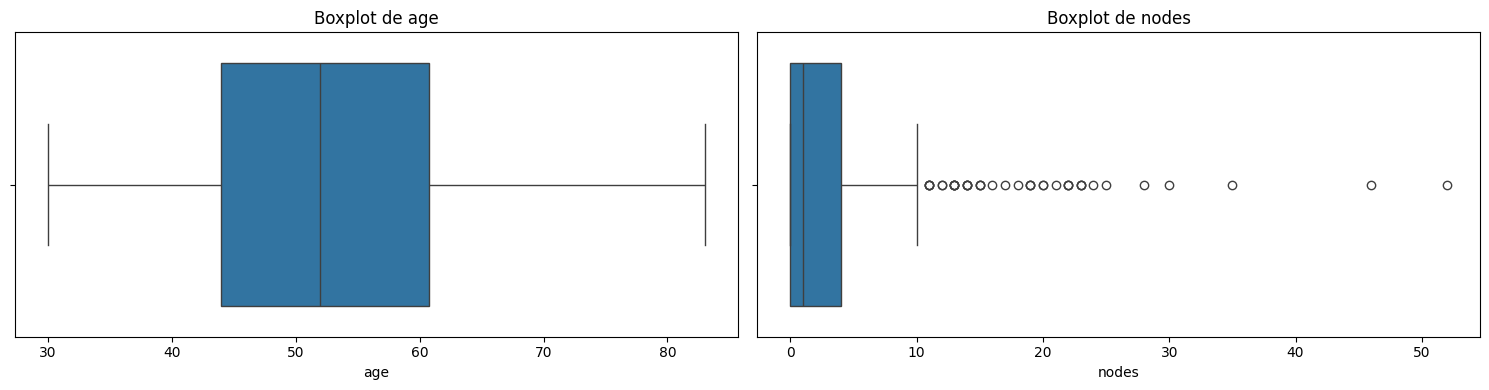

In [11]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 4))
# Crear boxplots para cada columna numérica
for i, col in enumerate(columns, 1):
    plt.subplot(1, 2, i)  # n filas, 3 columnas de subplots
    sns.boxplot(x=df_num[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [12]:
# Calcular la matriz de correlación
corr_matrix = df_num.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
corr_matrix

Matriz de correlación:


,age,nodes
age,1.000000,-0.063176
nodes,-0.063176,1.000000


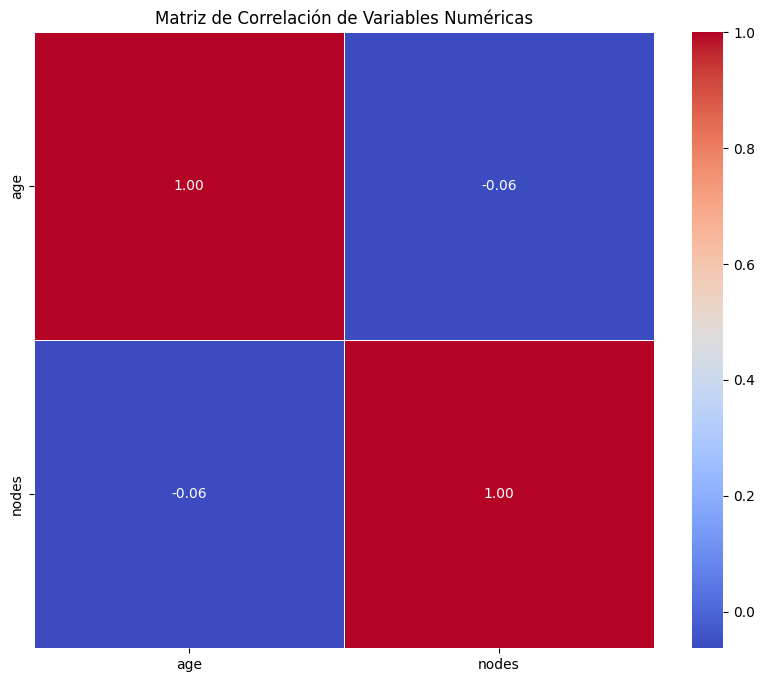

In [13]:
# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

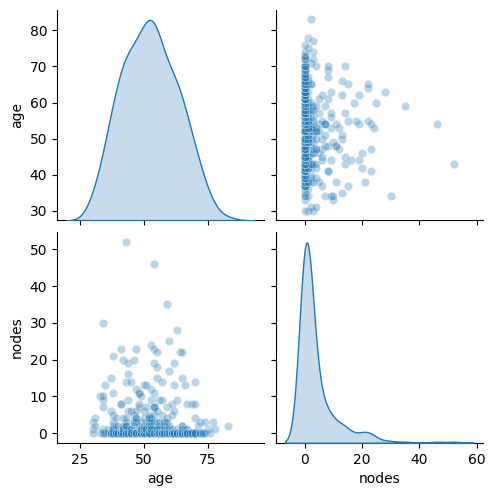

In [14]:
# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(df_num, plot_kws={'alpha': 0.3}, diag_kind='kde')

# Mostrar el gráfico
plt.show()

In [15]:
# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

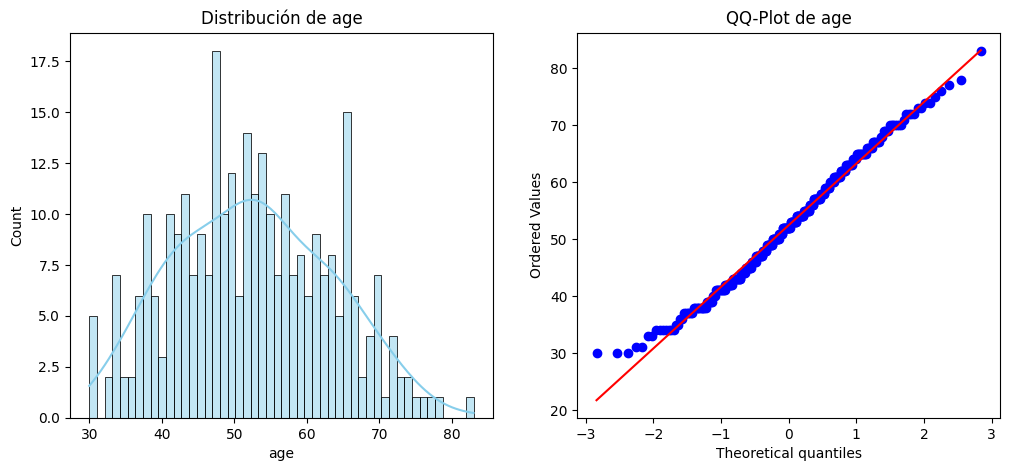


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.02605
Kolmogorov-Smirnov Test: p-valor = 0.46980
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00780


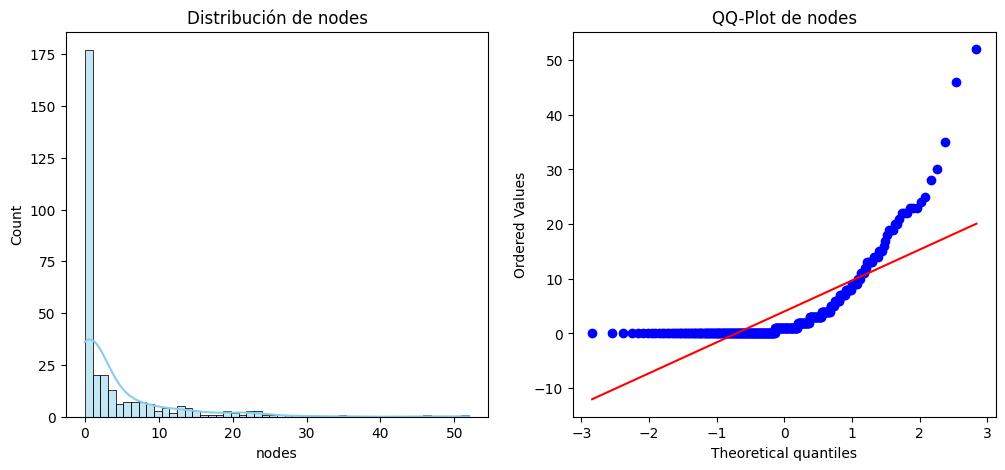


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 39.68662
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [16]:
# Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in columns:
    data = df_num[column]
    plot_distribution(data, column)
    normality_tests(data, column)